# Student Performance Analysis


For this project I will predict student performance.

## Load packages and dataset

In [339]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

## EDA

In [340]:
file = 'StudentsPerformance.csv'
df = pd.read_csv(file)

In [341]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [342]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [344]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [345]:
df['total'] = round((df['math score'] + df['reading score'] + df['writing score'])/3).astype('int')

In [346]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


<AxesSubplot:xlabel='test preparation course', ylabel='total'>

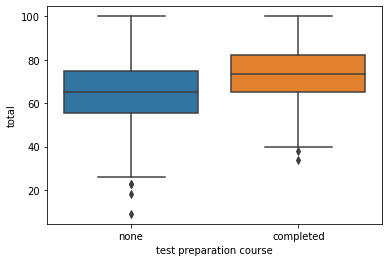

In [347]:
sns.boxplot(x="test preparation course", y="total", data=df)

<AxesSubplot:xlabel='lunch', ylabel='total'>

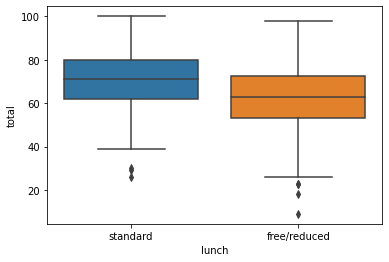

In [348]:
sns.boxplot(x="lunch", y="total", data=df)

<AxesSubplot:xlabel='parental level of education', ylabel='total'>

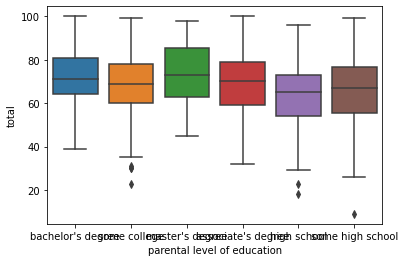

In [349]:
sns.boxplot(x="parental level of education", y="total", data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='total'>

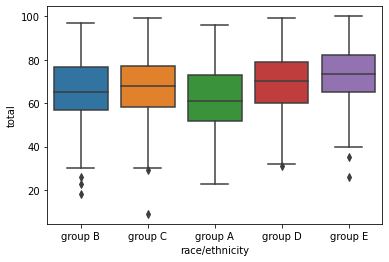

In [350]:
sns.boxplot(x="race/ethnicity", y="total", data=df)

<AxesSubplot:xlabel='gender', ylabel='total'>

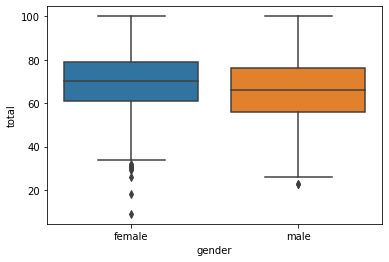

In [351]:
sns.boxplot(x="gender", y="total", data=df)

In [352]:
df = pd.get_dummies(df)

In [353]:
df.head(1)

,math score,reading score,writing score,total,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,73,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1


<AxesSubplot:>

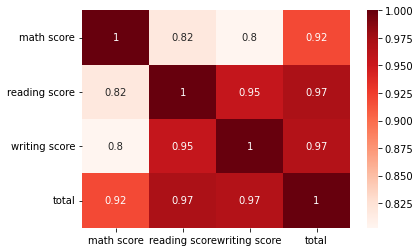

In [354]:
corrdf = df[['math score', 'reading score', 'writing score', 'total']]
corr=corrdf.corr()
sns.heatmap(corr, annot=True, cmap="Reds")

In [355]:
df.columns

Index(['math score', 'reading score', 'writing score', 'total',
       'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [356]:
y = df.pop('total')
dffeatures = ['gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']
X = df[dffeatures]

In [357]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [385]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=15 ,random_state=0)

In [386]:
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

In [387]:
y_pred_random=randomforest.predict(X_test)

In [389]:
from sklearn.metrics import accuracy_score
importances=randomforest.feature_importances_
for i,features in zip(importances,['math score', 'reading score', 'writing score', 'total',
       'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       "parental level of education_high school",
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']):
        print("{}:{}".format(features,i))
indices = np.argsort(importances)
print("random forest accuracy: ", randomforest.score(X,y))

math score:0.07850517173104944
reading score:0.071463588403426
writing score:0.05621170143013943
total:0.06687657740590763
gender_female:0.07450577266105843
gender_male:0.062444892734721515
race/ethnicity_group A:0.0678057101601617
race/ethnicity_group B:0.0616106112732846
race/ethnicity_group C:0.06320573610427885
race/ethnicity_group D:0.07194182143727783
race/ethnicity_group E:0.04772847523751657
parental level of education_associate's degree:0.05624978471838879
parental level of education_bachelor's degree:0.055514542398009646
parental level of education_high school:0.042685887242772474
parental level of education_master's degree:0.041895877687369035
parental level of education_some college:0.040853644839270974
parental level of education_some high school:0.040500204535367096
random forest accuracy:  0.231


In [391]:
from sklearn.tree import DecisionTreeClassifier
decisiontreegini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
decisiontreegini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [392]:
y_pred_gini = decisiontreegini.predict(X_test)

In [395]:
importances=decisiontreegini.feature_importances_
for i,features in zip(importances,['math score', 'reading score', 'writing score', 'total',
       'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       "parental level of education_high school",
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']):
        print("{}:{}".format(features,i))
indices = np.argsort(importances)
print('Decision Tree accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

math score:0.0
reading score:0.0
writing score:0.1312847537480335
total:0.0
gender_female:0.12047071959789499
gender_male:0.1404031929575643
race/ethnicity_group A:0.0
race/ethnicity_group B:0.0
race/ethnicity_group C:0.0
race/ethnicity_group D:0.14065218997296422
race/ethnicity_group E:0.0
parental level of education_associate's degree:0.0
parental level of education_bachelor's degree:0.14249601120165561
parental level of education_high school:0.0
parental level of education_master's degree:0.16110070082133024
parental level of education_some college:0.16359243170055718
parental level of education_some high school:0.0
Decision Tree accuracy: 0.0600


In [401]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

LinearRegression()

In [402]:
linearregpred = linearreg.predict(X_test)
linearreg.score(X_test,y_test)

0.21114221416385415